## Spotify Songs Data Explorations

In [20]:
# Import libraries 

import numpy as np 
import pandas as pd

# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### Load data

   - Download [spotify dataset from Kaggle](https://www.kaggle.com/geomack/spotifyclassification)



In [21]:
data = pd.read_csv('data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [22]:
data.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [26]:
# split the data into training and validation data

train, test = train_test_split(data, test_size = 0.15)

print("Training Size : {}  Test Size {}".format(len(train), len(test)))

Training Size : 1714  Test Size 303


In [27]:
train.shape

(1714, 17)

In [64]:
# create a subset with songs liked by the user where target = 1 or not = 0

pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']


In [59]:
# sns.distplot(pos_tempo, bins=30, hist=True, kde=False)

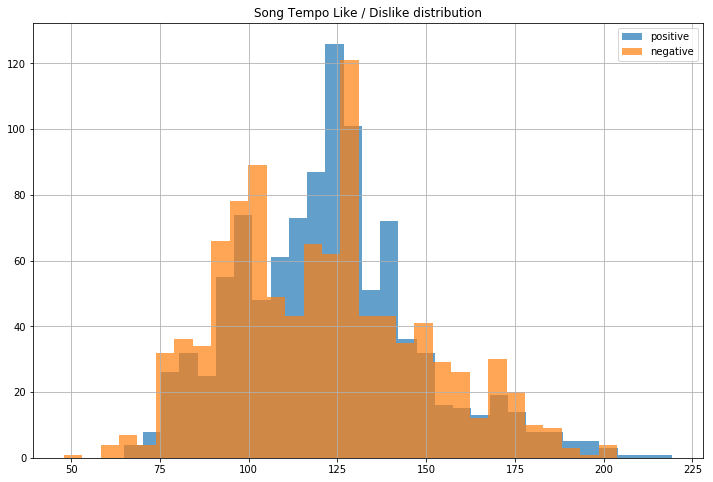

In [61]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like / Dislike distribution')
pos_tempo.hist(alpha= 0.7, bins=30, label='positive')
neg_tempo.hist(alpha= 0.7, bins=30, label='negative')
plt.legend(loc = "upper right")

<Figure size 1080x1080 with 0 Axes>

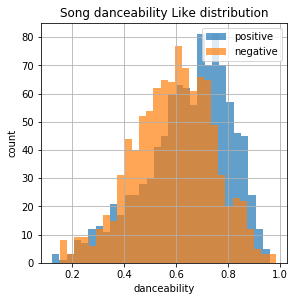

In [80]:
# Plotting with sub plot
fig2 = plt.figure(figsize=(15, 15))

#danceability

ax3 = fig2.add_subplot(331)
ax3.set_xlabel('danceability')
ax3.set_ylabel('count')
ax3.set_title('Song danceability Like distribution')
pos_dance.hist(alpha=0.7, bins=30,  label='positive')
neg_dance.hist(alpha=0.7, bins=30,  label='negative')
# ax3.legend(loc = "upper right")
plt.legend(loc = "upper right")

In [81]:
train.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')